<a href="https://colab.research.google.com/github/alyssamamaclay/HackTheHoodBuild/blob/main/%5BWeek_11%5D_Using_Python_for_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2023 Global Country Development & Prosperity Index: Using Python for Data Visualization




This dataset contains detailed rankings and indicators from the 2023 Legatum Prosperity Index, assessing and ranking countries based on various dimensions of prosperity and development.


In [27]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Load the dataset
index_data = pandas.read_csv("devandprosperityindex2023.csv")
index_data.head()


,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
0,Denmark,84.55,92.59,94.09,89.45,82.56,82.42,79.64,78.79,76.81,95.77,81.07,87.48,73.94
1,Sweden,83.67,90.97,91.90,86.41,78.29,82.81,75.54,79.67,76.18,95.33,82.28,85.92,78.74
2,Norway,83.59,93.30,94.10,89.66,79.03,82.24,75.95,75.87,77.25,94.70,82.98,85.68,72.37
3,Finland,83.47,89.56,91.96,90.41,77.27,84.12,77.25,78.77,70.28,94.46,81.19,88.38,77.99
4,Switzerland,83.42,95.66,87.50,87.67,69.14,80.81,83.84,78.65,79.71,94.66,82.11,87.72,73.60


### Exploratory Analysis

In [28]:
index_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     167 non-null    object 
 1   AveragScore                 167 non-null    float64
 2   SafetySecurity              167 non-null    float64
 3   PersonelFreedom             167 non-null    float64
 4   Governance                  167 non-null    float64
 5   SocialCapital               167 non-null    float64
 6   InvestmentEnvironment       167 non-null    float64
 7   EnterpriseConditions        167 non-null    float64
 8   MarketAccessInfrastructure  167 non-null    float64
 9   EconomicQuality             167 non-null    float64
 10  LivingConditions            167 non-null    float64
 11  Health                      167 non-null    float64
 12  Education                   167 non-null    float64
 13  NaturalEnvironment          167 non

In [29]:
index_data.describe()

,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,58.056228,67.242515,56.829401,50.360299,54.468024,53.013653,54.791677,55.019701,51.568683,69.803293,68.624910,58.723772,56.231737
std,13.309964,17.542279,19.914638,17.747092,10.350639,16.743723,12.876166,15.849004,13.427811,19.752677,11.166266,19.679023,9.061262
min,30.400000,16.540000,16.160000,13.090000,23.010000,21.690000,20.500000,24.230000,24.460000,19.210000,31.950000,16.780000,33.670000
25%,47.770000,59.290000,39.650000,37.470000,47.820000,40.765000,45.830000,40.055000,41.295000,55.830000,60.595000,44.355000,50.265000
50%,57.530000,68.930000,57.170000,47.510000,54.390000,51.250000,53.520000,56.590000,50.060000,74.770000,71.380000,61.930000,55.540000
75%,66.860000,80.560000,72.865000,60.965000,60.610000,64.640000,62.760000,69.060000,62.555000,86.975000,77.340000,74.130000,61.940000
max,84.550000,96.320000,94.100000,90.410000,82.560000,84.990000,83.840000,85.750000,80.100000,95.860000,86.890000,91.440000,78.740000


### Research Question 1:

According to the index, which country ranks the highest and which country ranks the lowest?

In [30]:
index_data.head()

,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
0,Denmark,84.55,92.59,94.09,89.45,82.56,82.42,79.64,78.79,76.81,95.77,81.07,87.48,73.94
1,Sweden,83.67,90.97,91.90,86.41,78.29,82.81,75.54,79.67,76.18,95.33,82.28,85.92,78.74
2,Norway,83.59,93.30,94.10,89.66,79.03,82.24,75.95,75.87,77.25,94.70,82.98,85.68,72.37
3,Finland,83.47,89.56,91.96,90.41,77.27,84.12,77.25,78.77,70.28,94.46,81.19,88.38,77.99
4,Switzerland,83.42,95.66,87.50,87.67,69.14,80.81,83.84,78.65,79.71,94.66,82.11,87.72,73.60


In [31]:
index_data.tail()

,Country,AveragScore,SafetySecurity,PersonelFreedom,Governance,SocialCapital,InvestmentEnvironment,EnterpriseConditions,MarketAccessInfrastructure,EconomicQuality,LivingConditions,Health,Education,NaturalEnvironment
162,Somalia,34.39,31.91,34.32,23.80,43.50,31.16,41.79,26.75,28.23,32.07,44.38,26.32,48.46
163,Afghanistan,34.18,20.93,31.02,29.47,31.17,30.25,42.01,29.67,33.75,39.74,50.91,27.11,44.11
164,Central African Republic,32.83,35.30,36.83,28.40,36.72,26.32,40.21,25.49,40.34,19.21,31.95,18.62,54.57
165,Yemen,32.65,22.60,25.30,18.20,38.44,22.76,33.12,30.93,28.81,41.58,57.45,28.12,44.49
166,South Sudan,30.40,16.54,26.98,22.16,36.10,33.34,37.52,32.89,32.30,21.99,35.69,18.99,50.35


Based on the index, the country that ranks the highest is Denmark, while the country that ranks the lowest is South Sudan.


### Research Question 2:
According to the index, which top 10 countries rank the highest in develpment and properity?

<ipython-input-32-8b3ef1ea0171>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', num_bars)(np.arange(num_bars))


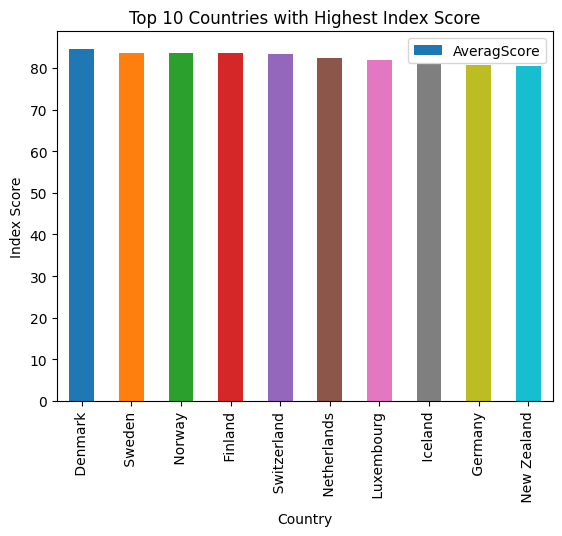

In [32]:
top_10 = index_data[['Country', 'AveragScore']].sort_values('AveragScore', ascending=False).head(10)
top_10

# Generate a list of unique colors
num_bars = len(top_10)
colors = cm.get_cmap('tab10', num_bars)(np.arange(num_bars))

#Bar Chart
top_10.plot(x = 'Country', y = 'AveragScore', kind = 'bar', title = 'Top 10 Countries with Highest Index Score', color = colors)
plt.xlabel('Country')
plt.ylabel('Index Score')
plt.show()



The bar chart illustrates the top 10 countries with the highest scores based on the development and prosperity index. The data was sorted in descending order according to the average index score

### Research Question 3: Health System Performance and Economic Prosperity

 What is the relationship between health indicators and index rankings?


In [33]:
health_data = index_data[['Country', 'AveragScore', 'Health']]
health_data

,Country,AveragScore,Health
0,Denmark,84.55,81.07
1,Sweden,83.67,82.28
2,Norway,83.59,82.98
3,Finland,83.47,81.19
4,Switzerland,83.42,82.11
...,...,...,...
162,Somalia,34.39,44.38
163,Afghanistan,34.18,50.91
164,Central African Republic,32.83,31.95
165,Yemen,32.65,57.45


<Axes: title={'center': 'Index Score x Health'}, xlabel='AveragScore', ylabel='Health'>

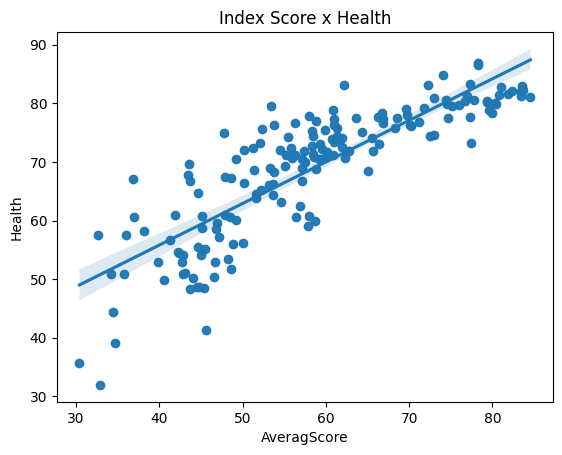

In [34]:
health_data.plot(kind = 'scatter', x = 'AveragScore', y = 'Health', title = 'Index Score x Health', s = 32, alpha = .8)
plt.xlabel('Index Score')
plt.ylabel('Health')
sns.regplot(x = 'AveragScore', y = 'Health', data = health_data)

The scatter plot visualizes the relationship between a country's overall index score (representing development and prosperity) and its health score.

The scatter plot suggests a positive relationship between the index score and health score. Countries with higher overall development and prosperity tend to have higher health performance scores. This indicates that economic prosperity and overall development are likely associated with stronger health systems and better health outcomes.